In [1]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF , WhiteKernel


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,111)

In [5]:
virtual_samples

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. ])

## define a callable Kriging model and sampling function

In [6]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_obs = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_obs.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_obs))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std), np.array(Y_obs)


# fixed noise level


In [7]:
# instantiate Bgolearn
Bgolearn = BGOS.Bgolearn()
method_name = 'PI'

obs = 5
tolerance = 0.05

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Probability of Improvement  : 
 x =  [8.7]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.8260050559857275
2 -th sampling, result =  4.310382703884572
3 -th sampling, result =  3.8017824548486296
4 -th sampling, result =  3.974303550445895
5 -th sampling, result =  4.392621573021635
evaluated mean of added datum: [4.06101907]
evaluated std of added datum: 0.24580367477485385
---------------------------------------

1-th iteration 
 new added datum: (8.700000000000001, array([4.06101907]))

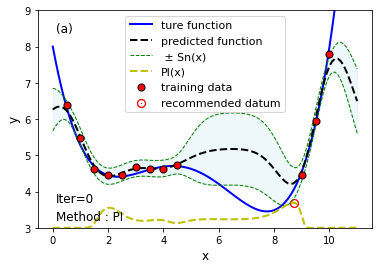

current optimal is : 4.061019067637291
The next datum recomended by Probability of Improvement  : 
 x =  [8.5]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.5193522186210244
2 -th sampling, result =  4.024859452472222
3 -th sampling, result =  4.053980378181056
4 -th sampling, result =  3.8576413501293327
5 -th sampling, result =  3.5865114970563208
evaluated mean of added datum: [3.80846898]
evaluated std of added datum: 0.2201691309619338
---------------------------------------

2-th iteration 
 new added datum: (8.5, array([3.80846898]))


<Figure size 432x288 with 0 Axes>

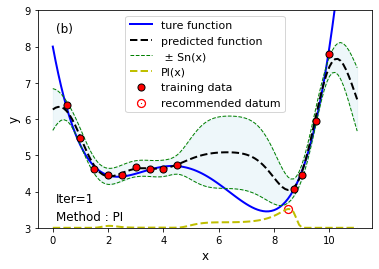

current optimal is : 3.808468979291991
The next datum recomended by Probability of Improvement  : 
 x =  [8.4]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.4412157378238106
2 -th sampling, result =  3.916310535669224
3 -th sampling, result =  3.5305504280323774
4 -th sampling, result =  3.345840025113484
5 -th sampling, result =  3.6738988070808887
evaluated mean of added datum: [3.58156311]
evaluated std of added datum: 0.19922187193894816
---------------------------------------

3-th iteration 
 new added datum: (8.4, array([3.58156311]))


<Figure size 432x288 with 0 Axes>

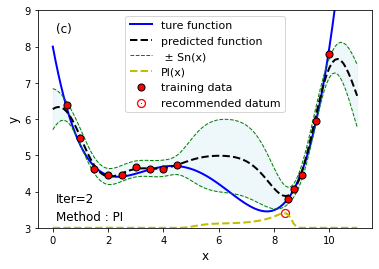

current optimal is : 3.581563106743957
The next datum recomended by Probability of Improvement  : 
 x =  [8.2]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.542123242411299
2 -th sampling, result =  3.5324217748705684
3 -th sampling, result =  3.730434124524907
4 -th sampling, result =  3.6748365642879874
5 -th sampling, result =  3.692355184989407
evaluated mean of added datum: [3.63443418]
evaluated std of added datum: 0.08140150468230749
---------------------------------------

4-th iteration 
 new added datum: (8.200000000000001, array([3.63443418]))


<Figure size 432x288 with 0 Axes>

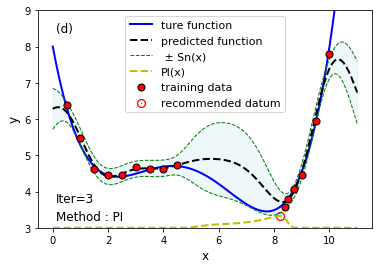

last response =  3.581563106743957
added datum y =  [3.63443418] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [24]:
guessed_noise_std = 0.3
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
   
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Probability of Improvement  : 
 x =  [8.6]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.200208052424008
2 -th sampling, result =  3.7122083660193335
3 -th sampling, result =  3.9454110401027247
4 -th sampling, result =  4.624532567351702
5 -th sampling, result =  3.8992816450961016
evaluated mean of added datum: [3.87632833]
evaluated std of added datum: 0.45807921774001736
---------------------------------------

1-th iteration 
 new added datum: (8.6, array([3.87632833]))


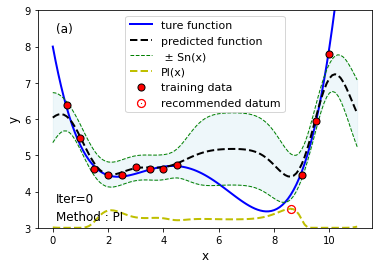

current optimal is : 3.8763283341987735
The next datum recomended by Probability of Improvement  : 
 x =  [8.4]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  4.526453640160573
2 -th sampling, result =  3.4546406194395094
3 -th sampling, result =  3.7363559412262193
4 -th sampling, result =  3.5095367228834218
5 -th sampling, result =  3.0888688414848477
evaluated mean of added datum: [3.66317115]
evaluated std of added datum: 0.47906666183773977
---------------------------------------

2-th iteration 
 new added datum: (8.4, array([3.66317115]))


<Figure size 432x288 with 0 Axes>

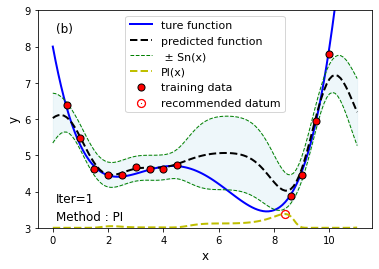

current optimal is : 3.663171153038914
The next datum recomended by Probability of Improvement  : 
 x =  [8.2]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.0218892539914948
2 -th sampling, result =  2.7595841472685794
3 -th sampling, result =  3.512792459400914
4 -th sampling, result =  3.0536365603034716
5 -th sampling, result =  3.436428622884986
evaluated mean of added datum: [3.15686621]
evaluated std of added datum: 0.2798381011615821
---------------------------------------

3-th iteration 
 new added datum: (8.200000000000001, array([3.15686621]))


<Figure size 432x288 with 0 Axes>

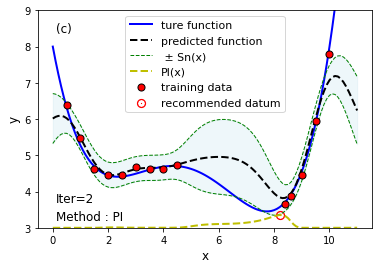

current optimal is : 3.1568662087698893
The next datum recomended by Probability of Improvement  : 
 x =  [7.9]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.256659580309793
2 -th sampling, result =  3.196226976238604
3 -th sampling, result =  3.821445564334112
4 -th sampling, result =  3.095528282627745
5 -th sampling, result =  3.1514237561689313
evaluated mean of added datum: [3.30425683]
evaluated std of added datum: 0.2639491198502794
---------------------------------------

4-th iteration 
 new added datum: (7.9, array([3.30425683]))


<Figure size 432x288 with 0 Axes>

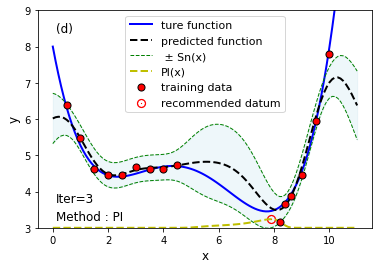

last response =  3.1568662087698893
added datum y =  [3.30425683] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [15]:
guessed_noise_std = 0.5
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Probability of Improvement  : 
 x =  [2.2]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.654792936410569
2 -th sampling, result =  4.88048055125987
3 -th sampling, result =  4.021564563572427
4 -th sampling, result =  4.63809173760846
5 -th sampling, result =  4.338761888496999
evaluated mean of added datum: [4.30673834]
evaluated std of added datum: 0.43505346769557524
---------------------------------------

1-th iteration 
 new added datum: (2.2, array([4.30673834]))


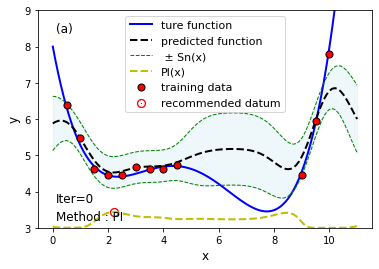

current optimal is : 4.306738335469666
The next datum recomended by Probability of Improvement  : 
 x =  [8.4]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.011085412872
2 -th sampling, result =  4.13932721493102
3 -th sampling, result =  4.349978030953528
4 -th sampling, result =  3.99089193272742
5 -th sampling, result =  3.1767707076332554
evaluated mean of added datum: [3.73361066]
evaluated std of added datum: 0.5371818644568478
---------------------------------------

2-th iteration 
 new added datum: (8.4, array([3.73361066]))


<Figure size 432x288 with 0 Axes>

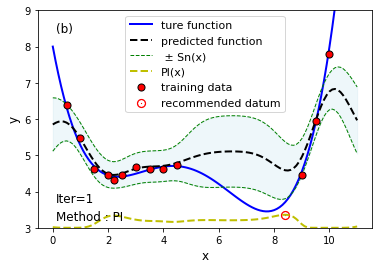

current optimal is : 3.7336106598234444
The next datum recomended by Probability of Improvement  : 
 x =  [8.2]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.1865761300729516
2 -th sampling, result =  1.9278933557529478
3 -th sampling, result =  2.7118014524792713
4 -th sampling, result =  4.411492314369796
5 -th sampling, result =  4.39551126105624
evaluated mean of added datum: [3.3266549]
evaluated std of added datum: 0.9668016153858794
---------------------------------------

3-th iteration 
 new added datum: (8.200000000000001, array([3.3266549]))


<Figure size 432x288 with 0 Axes>

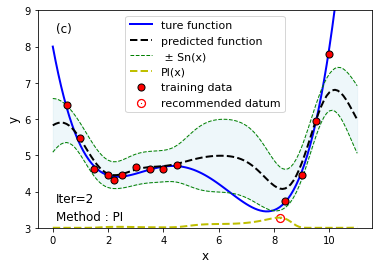

current optimal is : 3.326654902746241
The next datum recomended by Probability of Improvement  : 
 x =  [7.9]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  2.6242780685818774
2 -th sampling, result =  3.933543745613504
3 -th sampling, result =  2.8244615343632002
4 -th sampling, result =  2.8084364111898084
5 -th sampling, result =  3.2767642397661985
evaluated mean of added datum: [3.0934968]
evaluated std of added datum: 0.4718201866498609
---------------------------------------

4-th iteration 
 new added datum: (7.9, array([3.0934968]))


<Figure size 432x288 with 0 Axes>

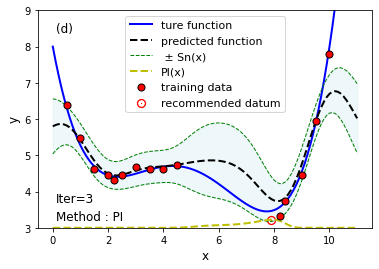

current optimal is : 3.0934967999029177
The next datum recomended by Probability of Improvement  : 
 x =  [7.7]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  2.257805880538889
2 -th sampling, result =  3.0123782812356628
3 -th sampling, result =  2.911183418404578
4 -th sampling, result =  3.3041951891833916
5 -th sampling, result =  3.1836365884878566
evaluated mean of added datum: [2.93383987]
evaluated std of added datum: 0.36421559954503774
---------------------------------------

5-th iteration 
 new added datum: (7.7, array([2.93383987]))


<Figure size 432x288 with 0 Axes>

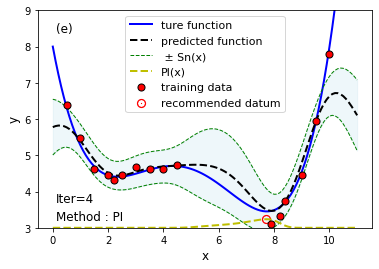

current optimal is : 2.9338398715700755
The next datum recomended by Probability of Improvement  : 
 x =  [7.5]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  2.56699086473346
2 -th sampling, result =  4.185724151653806
3 -th sampling, result =  4.609134503502869
4 -th sampling, result =  3.260539327537485
5 -th sampling, result =  1.8131812858115657
evaluated mean of added datum: [3.28711403]
evaluated std of added datum: 1.024402226223151
---------------------------------------

6-th iteration 
 new added datum: (7.5, array([3.28711403]))


<Figure size 432x288 with 0 Axes>

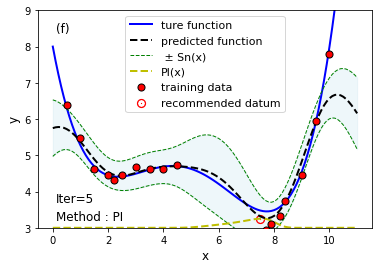

current optimal is : 2.9338398715700755
The next datum recomended by Probability of Improvement  : 
 x =  [7.5]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.3157648189079976
2 -th sampling, result =  3.135841964400127
3 -th sampling, result =  4.462102557957956
4 -th sampling, result =  2.959552093914842
5 -th sampling, result =  3.4540123617815217
evaluated mean of added datum: [3.46545476]
evaluated std of added datum: 0.5254382823302457
---------------------------------------

7-th iteration 
 new added datum: (7.5, array([3.46545476]))


<Figure size 432x288 with 0 Axes>

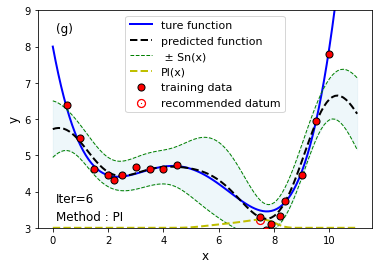

current optimal is : 2.9338398715700755
The next datum recomended by Probability of Improvement  : 
 x =  [7.5]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  2.8303223400059463
2 -th sampling, result =  3.842301491846844
3 -th sampling, result =  3.1011987200638917
4 -th sampling, result =  4.330784829737502
5 -th sampling, result =  3.570042284309138
evaluated mean of added datum: [3.53492993]
evaluated std of added datum: 0.5317310963717201
---------------------------------------

8-th iteration 
 new added datum: (7.5, array([3.53492993]))


<Figure size 432x288 with 0 Axes>

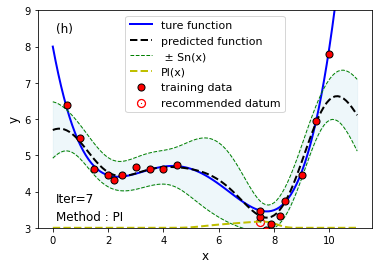

last response =  3.4654547593924887
added datum y =  [3.53492993] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [16]:
guessed_noise_std = 0.7
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

# optimal noise level of likelihood

In [25]:
def likelihood_opt_noise(xtrain,ytrain):
    noise_kernel = RBF() + WhiteKernel()
    noise_mdoel = GaussianProcessRegressor(kernel=noise_kernel,normalize_y=True).fit(xtrain,ytrain)
    optimal_noise = np.exp(noise_mdoel.kernel_.theta[1])
    return optimal_noise

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Probability of Improvement  : 
 x =  [8.8]
--------------Draw samples-------------
real std of added datum: 0.06713390624432107
1 -th sampling, result =  4.323710684767178
2 -th sampling, result =  4.267882926315281
3 -th sampling, result =  4.167763658081465
4 -th sampling, result =  4.249310191214307
5 -th sampling, result =  4.164030047376428
evaluated mean of added datum: [4.2345395]
evaluated std of added datum: 0.061175245914304587
---------------------------------------

1-th iteration 
 new added datum: (8.8, array([4.2345395]))


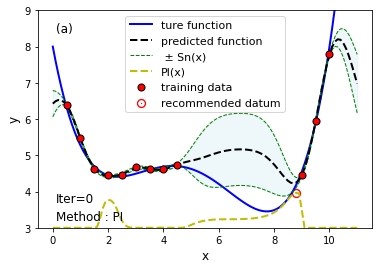

current optimal is : 4.234539501550932
The next datum recomended by Probability of Improvement  : 
 x =  [8.7]
--------------Draw samples-------------
real std of added datum: 0.05778125708837094
1 -th sampling, result =  4.04721306165295
2 -th sampling, result =  4.034127299291748
3 -th sampling, result =  4.134106253485132
4 -th sampling, result =  4.014352959394758
5 -th sampling, result =  3.980775007200497
evaluated mean of added datum: [4.04211492]
evaluated std of added datum: 0.05115761903795504
---------------------------------------

2-th iteration 
 new added datum: (8.700000000000001, array([4.04211492]))


<Figure size 432x288 with 0 Axes>

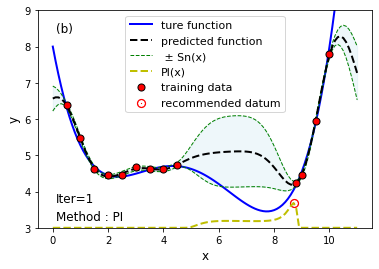

current optimal is : 4.0421149162050165
The next datum recomended by Probability of Improvement  : 
 x =  [8.5]
--------------Draw samples-------------
real std of added datum: 0.06801768380111745
1 -th sampling, result =  3.8049039163405354
2 -th sampling, result =  3.8402295433285087
3 -th sampling, result =  3.623812877754681
4 -th sampling, result =  3.790088742684638
5 -th sampling, result =  3.7970391483749033
evaluated mean of added datum: [3.77121485]
evaluated std of added datum: 0.0756947035393654
---------------------------------------

3-th iteration 
 new added datum: (8.5, array([3.77121485]))


<Figure size 432x288 with 0 Axes>

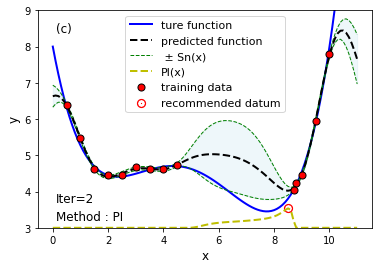

current optimal is : 3.771214845696653
The next datum recomended by Probability of Improvement  : 
 x =  [8.2]
--------------Draw samples-------------
real std of added datum: 0.0756865518628973
1 -th sampling, result =  3.649315590662305
2 -th sampling, result =  3.661399953785973
3 -th sampling, result =  3.5909232217307436
4 -th sampling, result =  3.657816312159131
5 -th sampling, result =  3.5841637692177972
evaluated mean of added datum: [3.62872377]
evaluated std of added datum: 0.03391933723836693
---------------------------------------

4-th iteration 
 new added datum: (8.200000000000001, array([3.62872377]))


<Figure size 432x288 with 0 Axes>

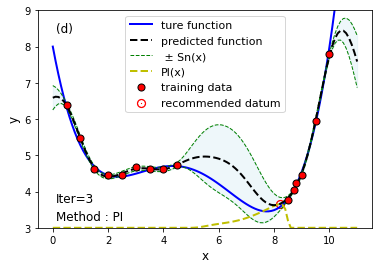

current optimal is : 3.62872376951119
The next datum recomended by Probability of Improvement  : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.06538099209759697
1 -th sampling, result =  3.4563601646766817
2 -th sampling, result =  3.55822103695865
3 -th sampling, result =  3.3966054423635477
4 -th sampling, result =  3.5039991909871904
5 -th sampling, result =  3.61510547227563
evaluated mean of added datum: [3.50605826]
evaluated std of added datum: 0.07624475003257311
---------------------------------------

5-th iteration 
 new added datum: (8.0, array([3.50605826]))


<Figure size 432x288 with 0 Axes>

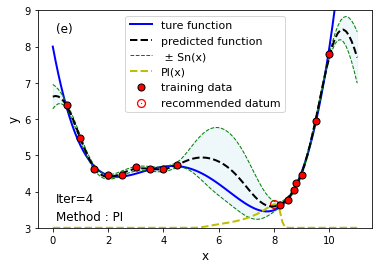

current optimal is : 3.5060582614523397
The next datum recomended by Probability of Improvement  : 
 x =  [7.8]
--------------Draw samples-------------
real std of added datum: 0.059422396869828316
1 -th sampling, result =  3.4049609227896136
2 -th sampling, result =  3.4060877128989553
3 -th sampling, result =  3.484204596532055
4 -th sampling, result =  3.447269053817165
5 -th sampling, result =  3.4473768193651724
evaluated mean of added datum: [3.43797982]
evaluated std of added datum: 0.029727689098724076
---------------------------------------

6-th iteration 
 new added datum: (7.800000000000001, array([3.43797982]))


<Figure size 432x288 with 0 Axes>

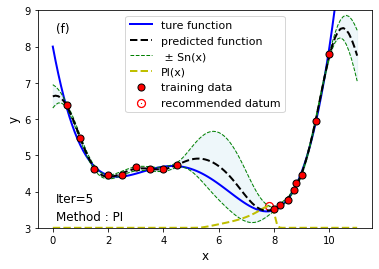

last response =  3.5060582614523397
added datum y =  [3.43797982] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [39]:
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]
tolerance = 0.03
response_array = copy.deepcopy(Measured_response)

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
noise_level = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    opt_noise = likelihood_opt_noise(data_matrix, Measured_response)
    noise_level.append(opt_noise)
    
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = opt_noise).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  

    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,np.sqrt(opt_noise),obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std**2)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('optnoise_likelihood__{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('optnoise_likelihood__{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('optnoise_likelihood_iter{time}data.csv'.format(time = i+1),float_format='%.4f') 

# optimal noise level of loocv

In [41]:
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
def loocv_opt_noise(X,Y):
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    R2_list = []
    sigma2_list = []
    for i in range(100):
        sigma2 = i/200 # variance, sigma2
        ypre = []
        noise_kernel = RBF() 
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            model = GaussianProcessRegressor(kernel=noise_kernel,alpha=sigma2,normalize_y=True,random_state=0).fit(X_train,y_train)
            y_pre = model.predict(X_test)
            ypre.append(y_pre)       
        R2_list.append(r2_score(Y,ypre))
        sigma2_list.append(sigma2)
        index = R2_list.index(max(R2_list))
    return sigma2_list[index]

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Probability of Improvement  : 
 x =  [8.6]
--------------Draw samples-------------
real std of added datum: 0.4301162633521313
1 -th sampling, result =  4.331128061565947
2 -th sampling, result =  4.201647098895767
3 -th sampling, result =  3.971610471774468
4 -th sampling, result =  3.7942152940126794
5 -th sampling, result =  3.504978751789106
evaluated mean of added datum: [3.96071594]
evaluated std of added datum: 0.2935270017511147
---------------------------------------

1-th iteration 
 new added datum: (8.6, array([3.96071594]))


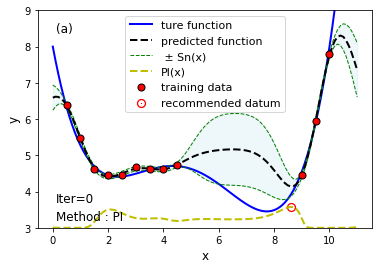

current optimal is : 3.960715935607594
The next datum recomended by Probability of Improvement  : 
 x =  [8.5]
--------------Draw samples-------------
real std of added datum: 0.15811388300841897
1 -th sampling, result =  3.8992774429121555
2 -th sampling, result =  3.8464539031547758
3 -th sampling, result =  3.5325251218369638
4 -th sampling, result =  3.6848359687882395
5 -th sampling, result =  3.7679224897652897
evaluated mean of added datum: [3.74620299]
evaluated std of added datum: 0.12913397153954567
---------------------------------------

2-th iteration 
 new added datum: (8.5, array([3.74620299]))


<Figure size 432x288 with 0 Axes>

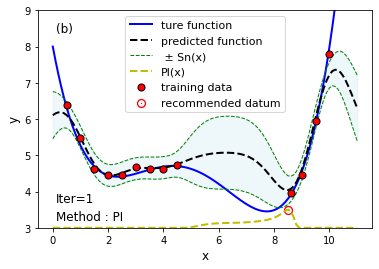

current optimal is : 3.7462029852914847
The next datum recomended by Probability of Improvement  : 
 x =  [8.2]
--------------Draw samples-------------
real std of added datum: 0.07071067811865475
1 -th sampling, result =  3.4889999507138674
2 -th sampling, result =  3.566807656456001
3 -th sampling, result =  3.4998258312795407
4 -th sampling, result =  3.512974125598555
5 -th sampling, result =  3.577310933667399
evaluated mean of added datum: [3.5291837]
evaluated std of added datum: 0.03597543935702235
---------------------------------------

3-th iteration 
 new added datum: (8.200000000000001, array([3.5291837]))


<Figure size 432x288 with 0 Axes>

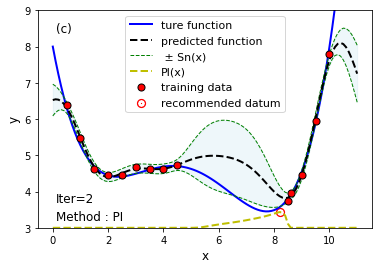

current optimal is : 3.529183699543073
The next datum recomended by Probability of Improvement  : 
 x =  [7.9]
--------------Draw samples-------------
real std of added datum: 0.07071067811865475
1 -th sampling, result =  3.5394152613290486
2 -th sampling, result =  3.5323426696019564
3 -th sampling, result =  3.5024400338014052
4 -th sampling, result =  3.4845726904436534
5 -th sampling, result =  3.5252858045303483
evaluated mean of added datum: [3.51681129]
evaluated std of added datum: 0.020346208368095062
---------------------------------------

4-th iteration 
 new added datum: (7.9, array([3.51681129]))


<Figure size 432x288 with 0 Axes>

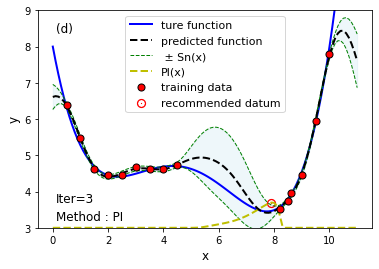

last response =  3.529183699543073
added datum y =  [3.51681129] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [44]:
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]
tolerance = 0.05
response_array = copy.deepcopy(Measured_response)

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
noise_level = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    # opt_noise = likelihood_opt_noise(data_matrix, Measured_response)
    opt_noise = loocv_opt_noise(data_matrix, Measured_response)
    noise_level.append(opt_noise)
    
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = opt_noise).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  

    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,np.sqrt(opt_noise),obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std**2)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('optnoise_loocv_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('optnoise_loocv_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('optnoise_loocv_iter{time}data.csv'.format(time = i+1),float_format='%.4f') 